# Grupo
- Cleber Pereira
- Otávio Cunha
- Pedro dos Santos

# Descrição do problema encontrado no dataset : Expectativa de vida.
## Este dataset reúne um conjunto de dados que mostram o comportamento de como cada feature do dataset influencia ou não na longevidade da população mundial.
### O problema a ser solucionado que escolhemos foi a influência do álcool, da Poliomelite(Pensando nas campanhas de vacinação estando cada vez mais discutidas pelo mundo), do HIV/AIDS que é um problema que sentimos cada dia mais distante, apesar de ser algo que deveria ser amplamente discutido e divulgado para a população; também estamos utilizando o status dos países (desenvolvidos/em desenvolvimento), a população e o ano das amostras.
### Os principais atributos definidos por nós foram: Álcool, Poliomelite, HIV/AIDS.


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
#Instalar as dependências necessárias, somente ao rodar o ambiente pela primeira vez, após isso comentar estas linhas para economizar tempo.

!pip install catboost
!pip install xgboost
!pip install lightgbm

In [96]:
# Obtendo o dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = pd.read_csv('datasets/LifeExpectancy.csv')
dataframe
dataframe.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [97]:
# Criando o Dataframe com as features escolhidas

df = dataframe [['Country','Year','Status','Life expectancy','Population','Alcohol', 'Polio',' HIV/AIDS']]
df

,Country,Year,Status,Life expectancy,Population,Alcohol,Polio,HIV/AIDS
0,Afghanistan,2015,Developing,65.0,33736494.0,0.01,6.0,0.1
1,Afghanistan,2014,Developing,59.9,327582.0,0.01,58.0,0.1
2,Afghanistan,2013,Developing,59.9,31731688.0,0.01,62.0,0.1
3,Afghanistan,2012,Developing,59.5,3696958.0,0.01,67.0,0.1
4,Afghanistan,2011,Developing,59.2,2978599.0,0.01,68.0,0.1
...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,12777511.0,4.36,67.0,33.6
2924,Zimbabwe,2003,Developing,44.5,12633897.0,4.06,7.0,36.7
2925,Zimbabwe,2002,Developing,44.8,125525.0,4.43,73.0,39.8
2926,Zimbabwe,2001,Developing,45.3,12366165.0,1.72,76.0,42.1


In [98]:
# Conhecendo o dataset antes do pré-processamento de dados
df.head()

,Country,Year,Status,Life expectancy,Population,Alcohol,Polio,HIV/AIDS
0,Afghanistan,2015,Developing,65.0,33736494.0,0.01,6.0,0.1
1,Afghanistan,2014,Developing,59.9,327582.0,0.01,58.0,0.1
2,Afghanistan,2013,Developing,59.9,31731688.0,0.01,62.0,0.1
3,Afghanistan,2012,Developing,59.5,3696958.0,0.01,67.0,0.1
4,Afghanistan,2011,Developing,59.2,2978599.0,0.01,68.0,0.1


In [99]:
# Listar as colunas do dataset
df.info()
# item 2
df.describe()
# item 2
print("shape: ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2928 non-null   object 
 1   Year             2928 non-null   int64  
 2   Status           2928 non-null   object 
 3   Life expectancy  2928 non-null   float64
 4   Population       2284 non-null   float64
 5   Alcohol          2735 non-null   float64
 6   Polio            2909 non-null   float64
 7    HIV/AIDS        2928 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 183.1+ KB
shape:  (2928, 8)


# Pré-processamento de dados

In [100]:
# Remover as linhas com valores NaN
df_clean = df.dropna()

# Opcional: Salvar o dataset limpo de volta para um arquivo CSV
df_clean.to_csv('datasets/LifeExpectancy_sem_nan.csv', index=False)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

Original dataset shape: (2928, 8)
Cleaned dataset shape: (2122, 8)


In [101]:
# Verificar se há duplicados
duplicates = df_clean.duplicated()
print("Número de duplicados encontrados:", duplicates.sum())

# Remover duplicados, se houver
df = df_clean.drop_duplicates()
print("Após remoção de duplicados, o novo tamanho do dataset é:", df.shape)


Número de duplicados encontrados: 0
Após remoção de duplicados, o novo tamanho do dataset é: (2122, 8)


In [102]:
# Atribuindo o dataframe limpo na variável df para facilitar o entendimento.
df = df_clean
print("Shape limpo: ",df_clean.shape)
df.head(250)

Shape limpo:  (2122, 8)


,Country,Year,Status,Life expectancy,Population,Alcohol,Polio,HIV/AIDS
0,Afghanistan,2015,Developing,65.0,33736494.0,0.01,6.0,0.1
1,Afghanistan,2014,Developing,59.9,327582.0,0.01,58.0,0.1
2,Afghanistan,2013,Developing,59.9,31731688.0,0.01,62.0,0.1
3,Afghanistan,2012,Developing,59.5,3696958.0,0.01,67.0,0.1
4,Afghanistan,2011,Developing,59.2,2978599.0,0.01,68.0,0.1
...,...,...,...,...,...,...,...,...
340,Botswana,2011,Developing,62.2,251339.0,5.76,96.0,5.5
341,Botswana,2010,Developing,61.1,214866.0,5.99,96.0,6.2
342,Botswana,2009,Developing,59.2,1979882.0,5.01,96.0,9.0
343,Botswana,2008,Developing,57.5,1946351.0,6.56,96.0,12.7


#Histograma para a variável "Alcohol"

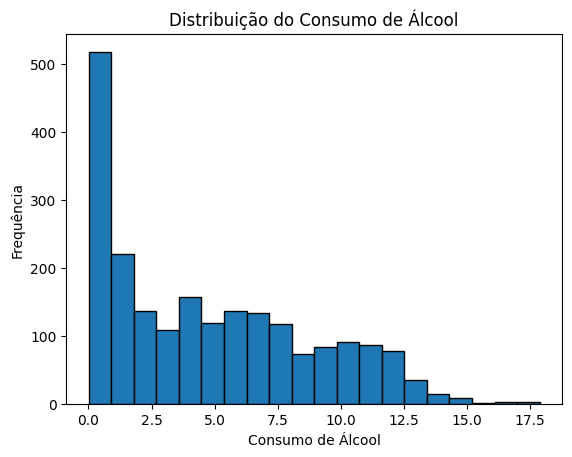

In [103]:
# Histograma para a variável 'Alcohol'
plt.hist(df['Alcohol'], bins=20, edgecolor='black')
plt.xlabel('Consumo de Álcool')
plt.ylabel('Frequência')
plt.title('Distribuição do Consumo de Álcool')
plt.show()


#### De acordo com este histograma acima, pode-se dizer que há mais pessoas que não consomem álcool nos dados apresentados

### Boxplot para a feature 'Life expectamcy' usando a feature 'Status' como comparativo.

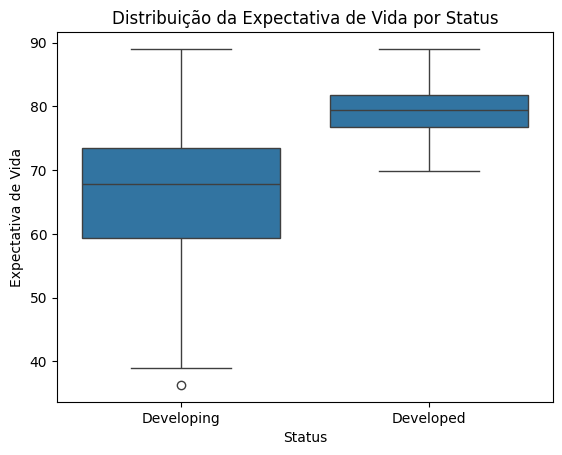

In [104]:
# Boxplot para a variável 'Life expectancy'
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.xlabel('Status')
plt.ylabel('Expectativa de Vida')
plt.title('Distribuição da Expectativa de Vida por Status')
plt.show()

#### Neste gráfico acima, podemos ver um influência no aumento de expectativa de vida em países desenvolvidos.

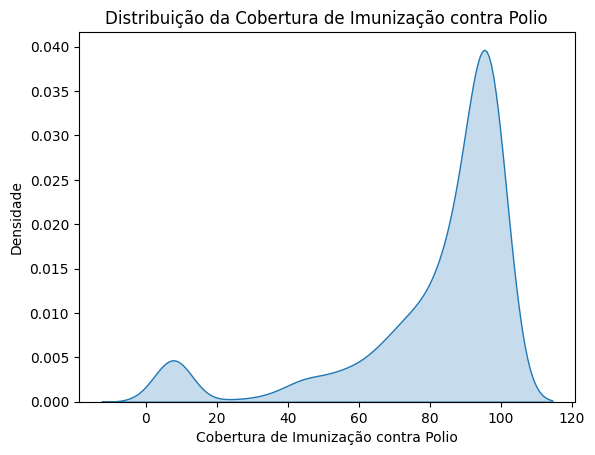

In [105]:
# Exemplo de gráfico de densidade para a variável 'Polio'
sns.kdeplot(df['Polio'], fill=True)
plt.xlabel('Cobertura de Imunização contra Polio')
plt.ylabel('Densidade')
plt.title('Distribuição da Cobertura de Imunização contra Polio')
plt.show()

<br><br>
#### Matriz de correlação das variáveis numéricas

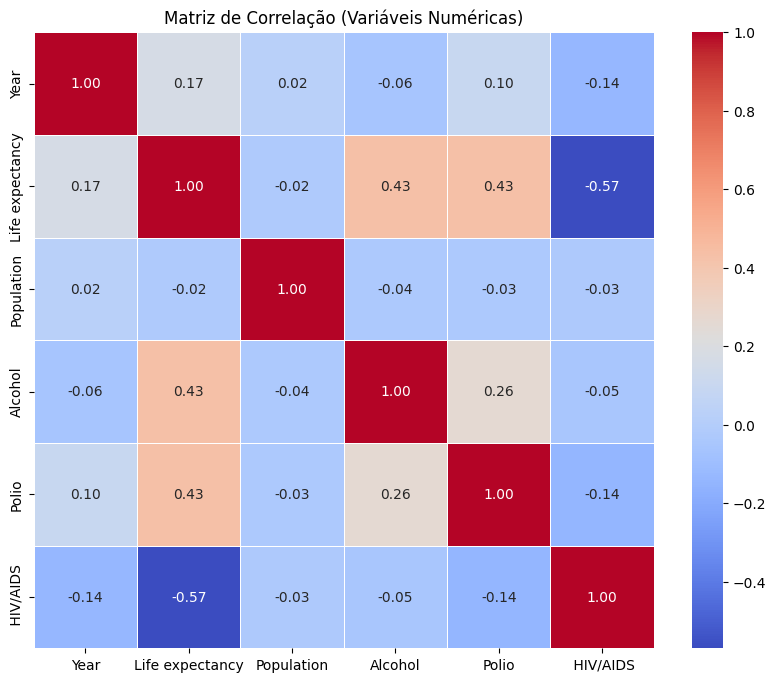

In [106]:
# Identificar colunas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Filtrar DataFrame para incluir apenas colunas numéricas
numeric_df = df[numeric_cols]

# Calcular matriz de correlação
corr_matrix = numeric_df.corr()

# Plotar heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.show()

<br>

#### 1.Uso de um modelo de regressão (CatBoostRegressor) antes do refinamento.



In [107]:
# from catboost import CatBoostRegressor, Pool
# X = df.drop(columns='Life expectancy')
# y = df['Life expectancy']
# print("Shape: ",df_clean.shape)

# # Converter colunas categóricas para strings
# X['Country'] = X['Country'].astype(str)
# X['Year'] = X['Year'].astype(str)
# X['Status'] = X['Status'].astype(str)
# X['Population'] = X['Population'].astype(str)
# X['Alcohol'] = X['Alcohol'].astype(str)
# X['Polio'] = X['Polio'].astype(str)
# X[' HIV/AIDS'] = X[' HIV/AIDS'].astype(str)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
#                                                     random_state=42)

# pool_train = Pool(X_train, y_train,
#                   cat_features = ['Country','Year','Status','Population','Alcohol','Polio', ' HIV/AIDS'])

# pool_test = Pool(X_test, cat_features = ['Country','Year','Status','Population','Alcohol','Polio',' HIV/AIDS'])


# # CatBoost

# import time

# start = time.time()

# cbr = CatBoostRegressor(iterations=100,max_depth=10)

# cbr.fit(pool_train)
# y_pred = cbr.predict(X_test)

# from sklearn.metrics import r2_score as RSquared


# cb_rsquared = np.sqrt(RSquared(y_test, y_pred))
# print("R Squared no modelo CatBoost: ", np.mean(cb_rsquared))

# end = time.time()
# diff = end - start
# print('Tempo de execução:', diff)

# from sklearn.metrics import mean_absolute_error, mean_squared_error


# # Métricas adicionais
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print("Mean Absolute Error (MAE):", mae)
# print("Root Mean Squared Error (RMSE):", rmse)


# # Importância das Features
# feature_importances = cbr.get_feature_importance(Pool(X_train, y_train, cat_features=['Country', 'Year', 'Status', 'Population', 'Alcohol','Polio', ' HIV/AIDS']))

# feature_names = X_train.columns

# # Exibir a importância das features
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importancia': feature_importances})
# importance_df = importance_df.sort_values(by='Importancia', ascending=False)
# print(importance_df)

# plt.figure(figsize=(12, 6))
# sns.barplot(x='Importancia', y='Feature', data=importance_df)
# plt.title('Importância das Features - CatBoost')
# plt.show()


<br><br>
#### Melhorando o desempenho do catboost com ajuste de hiperparâmetros e grid_search, conforme novas pesquisas.

In [108]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# Parâmetros a serem ajustados
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Inicializando o modelo
catboost = CatBoostRegressor(cat_features=['Country', 'Status'], verbose=0)

# Grid Search
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_catboost = grid_search.best_estimator_

# Previsões e avaliação
y_pred = best_catboost.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.7209646547055912
Root Mean Squared Error (RMSE): 2.5508435949447996


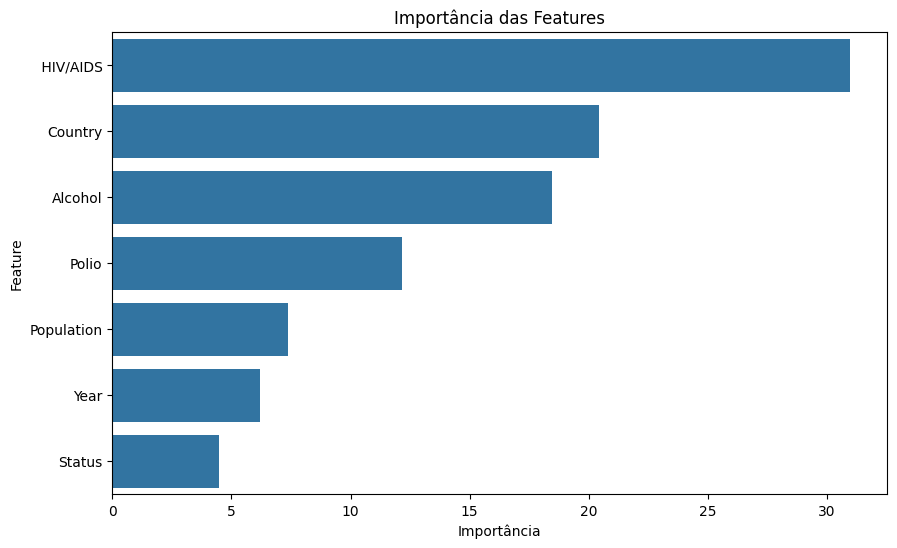

In [109]:
# Best_catboost é o melhor modelo CatBoost ajustado com GridSearchCV
feature_importances = best_catboost.feature_importances_
feature_names = X.columns

# Criando DataFrame de importâncias
importance_df = pd.DataFrame({'Feature': feature_names, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Plotando gráfico de histograma da importância de cada feature
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Feature', data=importance_df)
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

<br><br>
#### Uso do modelo de regressão (XGBoost) com avaliação de importância das features escolhidas

#### 2. XGBoost

Shape:  (2122, 8)
Mean Absolute Error (MAE): 1.6533612006692326
Root Mean Squared Error (RMSE): 2.447557803240787
R Squared para o modelo XGBoost: 0.9704938588628703
      Feature  Importancia
6    HIV/AIDS     0.665296
2      Status     0.213297
4     Alcohol     0.053947
0     Country     0.027095
5       Polio     0.024418
3  Population     0.008910
1        Year     0.007036


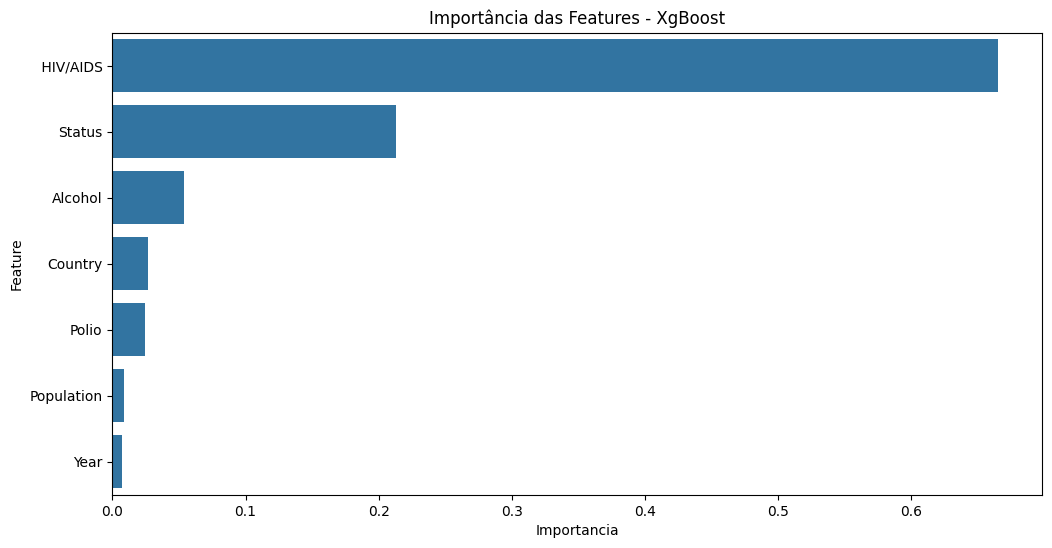

Tempo de execução: 0.5447843074798584


In [110]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import time

# Copiando o DataFrame original
df_clean = df.copy()
print("Shape: ",df_clean.shape)
# Codificando variáveis categóricas
lbl = preprocessing.LabelEncoder()
df_clean['Country'] = lbl.fit_transform(df_clean['Country'].astype(str))
df_clean['Status'] = lbl.fit_transform(df_clean['Status'].astype(str))

# Separando variáveis preditoras (X) e variável alvo (y)
X = df_clean.drop(columns='Life expectancy')
y = df_clean['Life expectancy']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

start = time.time()

# Criando o modelo XGBoost Regressor
xgbr = xgb.XGBRegressor()

# Treinando o modelo
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = np.sqrt(r2_score(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R Squared para o modelo XGBoost:", r_squared)

# Obtendo a importância das features
feature_importances = xgbr.feature_importances_
feature_names = X_train.columns

# Criando um DataFrame para exibir a importância das features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)
print(importance_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Feature', data=importance_df)
plt.title('Importância das Features - XgBoost')
plt.show()

end = time.time()
diff = end - start
print('Tempo de execução:', diff)


### 3.Modelo Random Forest com gráfico de importância das features

Random Forest Regressor
Mean Absolute Error (MAE): 1.7836966352939925
Root Mean Squared Error (RMSE): 2.686252066756089
R Squared (R2): 0.9299650033791445
Tempo de execução: 82.44028902053833
      Feature  Importancia
6    HIV/AIDS     0.651287
4     Alcohol     0.123899
0     Country     0.078409
2      Status     0.053006
5       Polio     0.043165
3  Population     0.025266
1        Year     0.024968


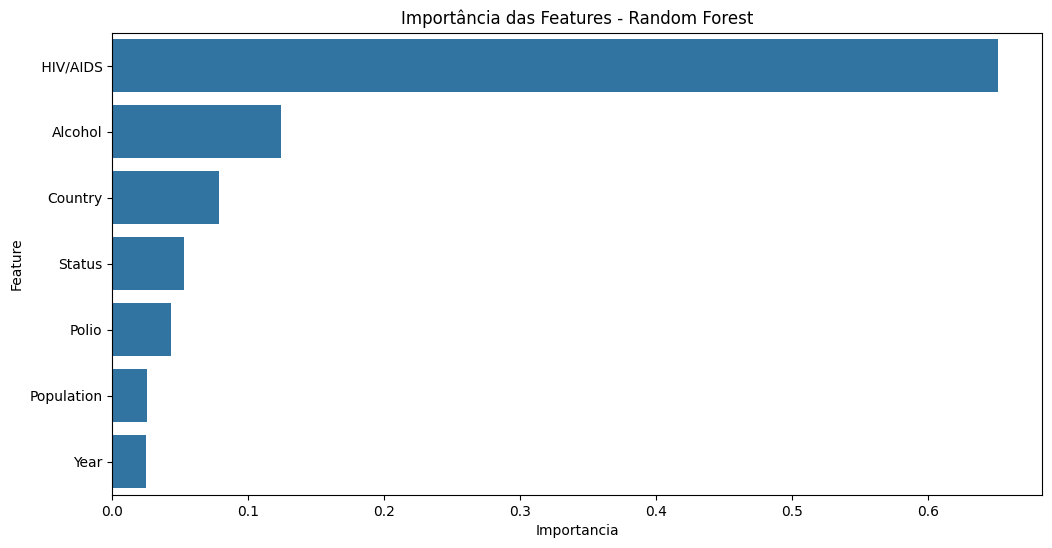

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Treinamento do modelo de Random Forest
start = time.time()
rf = RandomForestRegressor(n_estimators=10000, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
end = time.time()

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R Squared (R2):", r2)
print('Tempo de execução:', end - start)

# Importância das Features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importancia': rf.feature_importances_})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)
print(importance_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Feature', data=importance_df)
plt.title('Importância das Features - Random Forest')
plt.show()


## Cross-Validation

In [112]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Definir os modelos
catboost_model = CatBoostRegressor(verbose=0)
xgboost_model = XGBRegressor()
random_forest_model = RandomForestRegressor()


In [113]:
# Função para calcular RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Definir os scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)


In [114]:
# Realizar validação cruzada para CatBoost
catboost_mae_scores = cross_val_score(catboost_model, X, y, cv=10, scoring=mae_scorer)
catboost_rmse_scores = cross_val_score(catboost_model, X, y, cv=10, scoring=rmse_scorer)

# Realizar validação cruzada para XGBoost
xgboost_mae_scores = cross_val_score(xgboost_model, X, y, cv=10, scoring=mae_scorer)
xgboost_rmse_scores = cross_val_score(xgboost_model, X, y, cv=10, scoring=rmse_scorer)

# Realizar validação cruzada para Random Forest
random_forest_mae_scores = cross_val_score(random_forest_model, X, y, cv=10, scoring=mae_scorer)
random_forest_rmse_scores = cross_val_score(random_forest_model, X, y, cv=10, scoring=rmse_scorer)

# Exibir os resultados
print("CatBoost - MAE: {:.4f} +/- {:.4f}".format(-catboost_mae_scores.mean(), catboost_mae_scores.std()))
print("CatBoost - RMSE: {:.4f} +/- {:.4f}".format(-catboost_rmse_scores.mean(), catboost_rmse_scores.std()))

print("XGBoost - MAE: {:.4f} +/- {:.4f}".format(-xgboost_mae_scores.mean(), xgboost_mae_scores.std()))
print("XGBoost - RMSE: {:.4f} +/- {:.4f}".format(-xgboost_rmse_scores.mean(), xgboost_rmse_scores.std()))

print("Random Forest - MAE: {:.4f} +/- {:.4f}".format(-random_forest_mae_scores.mean(), random_forest_mae_scores.std()))
print("Random Forest - RMSE: {:.4f} +/- {:.4f}".format(-random_forest_rmse_scores.mean(), random_forest_rmse_scores.std()))


CatBoost - MAE: 4.0828 +/- 0.5648
CatBoost - RMSE: 5.0699 +/- 0.6217
XGBoost - MAE: 4.3427 +/- 0.7491
XGBoost - RMSE: 5.4250 +/- 0.8726
Random Forest - MAE: 4.3871 +/- 0.7061
Random Forest - RMSE: 5.4149 +/- 0.8563


# Discussão dos melhores resultados no conjunto de testes

- XGBoost é o melhor modelo no conjunto de testes, pois apresentou as menores métricas de erro tanto para MAE quanto para RMSE.
  - Importância das Features: As features mais importantes são HIV/AIDS, Status e Alcohol.
- Após ajuste de hiperparâmetros, o CatBoost teve uma melhora significativa em suas métricas de erro, ficando próximo ao XGBoost em termos de MAE e RMSE.
  - O ajuste de hiperparâmetros via Grid-Search contribuiu para melhorar a precisão do modelo.
- O Random Forest apresentou um desempenho competitivo, mas com métricas de erro ligeiramente piores que o XGBoost e CatBoost.
  - Importância das Features: As features mais importantes são HIV/AIDS, Alcohol e Country.

### Conclusão para conjunto de testes
Esses resultados indicam que o XGBoost foi o modelo mais eficaz em prever a expectativa de vida com base nos dados disponíveis.

# Discussão dos resultados obtidos após o Cross-validation

### Catboost

- Desempenho: O CatBoost teve a melhor performance na validação cruzada em termos de MAE e RMSE, embora a variação (±) sugira que o modelo pode ser menos consistente em diferentes folds.
- Conclusão: Indica que o CatBoost pode generalizar bem para diferentes subsets de dados, apesar da variabilidade.

### XGBoost


- Desempenho: XGBoost teve métricas de erro maiores na validação cruzada comparado ao conjunto de testes, indicando possível overfitting no treinamento.
- Conclusão: Embora tenha apresentado excelente desempenho no conjunto de testes, a validação cruzada sugere que o modelo pode não generalizar tão bem para novos dados.


### Random Forest

- Desempenho: Similar ao XGBoost, com métricas de erro ligeiramente maiores na validação cruzada.
- Conclusão: Indica uma tendência ao overfitting, embora a performance seja razoavelmente estável.

## Conclusão geral dos resultados obtidos

- Melhor Modelo no Conjunto de Testes: O XGBoost mostrou o melhor desempenho, com as menores métricas de erro no conjunto de testes.
- Melhor Modelo na Validação Cruzada: O CatBoost teve uma performance superior na validação cruzada, sugerindo melhor generalização.


# Estratégias/Sugestões de melhoria dos modelos

- Se possível, obter mais dados para treinamento. Mais dados podem ajudar a reduzir o overfitting, permitindo que o modelo generalize melhor.
- Aplicar técnicas de regularização mais agressivas para modelos como XGBoost e CatBoost, o que pode ajudar a controlar o overfitting.
- Explorar novas features ou transformações de features existentes para melhorar a capacidade preditiva dos modelos.
- Model Tuning: Mais experimentação com tuning de hiperparâmetros, especialmente para modelos que mostram variabilidade na cross-validation.


# Discussão mais ampla e com visão de resoluções no mundo real

- Nos modelos como XGBoost, CatBoost e Random Forest, as variáveis relacionadas ao HIV/AIDS e à vacinação contra Polio (Polio) foram consistentemente identificadas como importantes para prever a expectativa de vida.
Isso é evidenciado pelos valores de importância das features atribuídos a essas variáveis em cada modelo.

- Interpretação dos Resultados:

  - Os modelos indicam que o índice de HIV/AIDS e a presença de vacinação contra Polio têm um impacto significativo na previsão da expectativa de vida.
Variáveis como Status (indicando se o país é desenvolvido ou em desenvolvimento), Alcohol (consumo de álcool per capita), e Country (país) também mostraram alguma influência, embora em menor grau dependendo do modelo.

- Limitações e Considerações:

  - Embora os modelos demonstrem uma relação significativa entre essas variáveis e a expectativa de vida, é importante ressaltar que correlação não implica causalidade direta.
  - Outros fatores não incluídos no modelo também podem ter um impacto substancial na expectativa de vida, como acesso à saúde, qualidade dos serviços de saúde, condições socioeconômicas, entre outros.

- Análise geral

  - Com base nos resultados dos modelos, é razoável concluir que políticas e intervenções voltadas para o controle do HIV/AIDS e para a vacinação contra Polio podem ter um efeito positivo na melhoria da expectativa de vida da população.
  - No entanto, para uma compreensão mais completa e precisa, seria necessário realizar estudos adicionais e considerar uma gama mais ampla de variáveis e contextos específicos de cada país ou região.


## Conclusão final
  
- Portanto, enquanto os resultados dos modelos oferecem insights valiosos, é essencial interpretá-los com cautela e considerar o contexto mais amplo ao formular conclusões sobre os fatores que influenciam a expectativa de vida da população.